# Shuhood Ahmad Shahid  
**Reg. No:** B23F0001AI027
**Section:** AI Green  
**Course:** ML Lab 06

**Date:** 17/10/2025

##  **Task 1: Exploratory Data Analysis & Preprocessing**
Load the dataset and check its basic structure.


In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
# Load into DataFrame
df = pd.read_csv('breast_cancer_dataset.csv')
df.head()

Saving breast_cancer_dataset.csv to breast_cancer_dataset.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# Drop extra unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

### Check for missing values and dataset info
I check for any null values and understand feature types.


In [3]:
print("Missing values in each column:")
df.info()
df.isnull().sum()



Missing values in each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### Summary statistics and class distribution
Helps understand data spread and target balance.


In [4]:
df.describe()
df['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


### Encode categorical target if needed (e.g. M → 1, B → 0)
Convert diagnosis labels into numeric form.


In [5]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


### Split into Train, Validation, and Test sets (60/20/20)
We ensure data is divided properly for unbiased evaluation.


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train.shape, X_val.shape, X_test.shape


((341, 31), (114, 31), (114, 31))

### Scale features using StandardScaler
I fit scaler on training data only and transform all sets.


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


##  **Task 2: Train & Evaluate Basic SVM**
I train a linear SVM within a pipeline and evaluate its performance.


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Create pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
])

# Train on training data
svm_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(kernel='linear', probability=True, random_state=42))])

### Evaluate model on validation data
Check accuracy, confusion matrix, and classification report.


In [10]:
y_val_pred = svm_pipe.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Confusion Matrix:
 [[71  0]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Compute and display ROC AUC
Measures model’s ability to distinguish classes.


In [11]:
y_val_prob = svm_pipe.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_prob)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9963969865705863


### Plot ROC Curve
Visualize model performance in terms of TPR vs FPR.


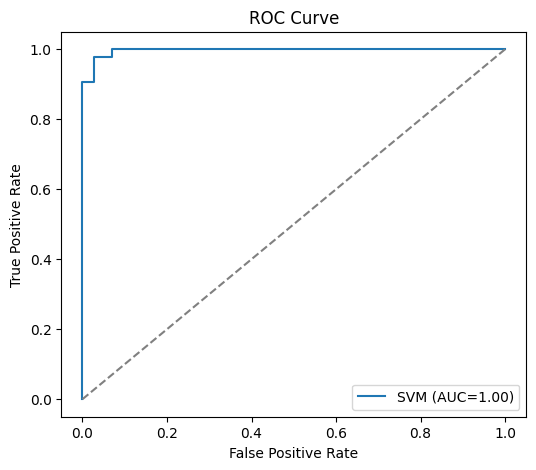

In [12]:
fpr, tpr, _ = roc_curve(y_val, y_val_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## **Task 3: Hyperparameter Tuning**
Use GridSearchCV to find best SVM parameters (C, gamma, kernel, degree).


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3, 4]
}

grid = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best ROC AUC Score:", grid.best_score_)


Best Parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best ROC AUC Score: 0.9930806712667177


### Evaluate best model on validation data
I use best estimator from grid search for validation evaluation.


In [14]:
best_model = grid.best_estimator_
y_val_pred_best = best_model.predict(X_val)
y_val_prob_best = best_model.predict_proba(X_val)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_best))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_best))
print("ROC AUC:", roc_auc_score(y_val, y_val_prob_best))


Confusion Matrix:
 [[71  0]
 [ 4 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC: 0.9963969865705863


##  **Task 4: Misclassification & Margin Analysis**
Inspect support vectors and decision boundary distances.


In [15]:
# Access support vectors
sv = best_model.named_steps['svm'].support_vectors_
print("Number of Support Vectors:", sv.shape[0])


Number of Support Vectors: 30


### Identify misclassified test samples
I find indices of wrong predictions.


In [16]:
y_test_pred = best_model.predict(X_test)
misclassified_idx = (y_test_pred != y_test).to_numpy().nonzero()[0]
print("Misclassified Indices:", misclassified_idx)


Misclassified Indices: [16 26 53 65 92]


### Compute distance from decision boundary for misclassified samples
Formula: w^T x + b


In [17]:
import numpy as np

svc = best_model.named_steps['svm']
w = svc.coef_[0]
b = svc.intercept_[0]

# Compute distances
distances = np.dot(X_test_scaled, w) + b
mis_dist = distances[misclassified_idx]

print("Distances of Misclassified Samples:", mis_dist)


Distances of Misclassified Samples: [-0.71332373 -1.92162901 -0.13088311 -2.29765854 -0.23512008]


### Margin tradeoff: effect of smaller vs larger C
Compare results for two models with different C values.


In [18]:
for c_val in [0.1, 10]:
    temp_model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=c_val, probability=True, random_state=42))
    ])
    temp_model.fit(X_train, y_train)
    y_val_pred_c = temp_model.predict(X_val)
    print(f"\nC={c_val}  -->  Misclassifications:", sum(y_val_pred_c != y_val))



C=0.1  -->  Misclassifications: 4

C=10  -->  Misclassifications: 5


##  **Task 5: Compare SVM vs Logistic Regression**
Train a Logistic Regression model with regularization for comparison.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Logistic Regression pipeline
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500, C=1.0, solver='lbfgs', random_state=42))
])

logreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=500, random_state=42))])

### Evaluate Logistic Regression on validation data
I compute accuracy, precision, recall, and ROC AUC.


In [20]:
y_val_pred_lr = logreg_pipe.predict(X_val)
y_val_prob_lr = logreg_pipe.predict_proba(X_val)[:, 1]

lr_acc = accuracy_score(y_val, y_val_pred_lr)
lr_prec = precision_score(y_val, y_val_pred_lr)
lr_rec = recall_score(y_val, y_val_pred_lr)
lr_auc = roc_auc_score(y_val, y_val_prob_lr)

print(f"Accuracy: {lr_acc:.3f}")
print(f"Precision: {lr_prec:.3f}")
print(f"Recall: {lr_rec:.3f}")
print(f"ROC AUC: {lr_auc:.3f}")


Accuracy: 0.974
Precision: 1.000
Recall: 0.930
ROC AUC: 1.000


### Compare with Tuned SVM Results
I calculate same metrics for SVM to compare both models.


In [21]:
y_val_pred_svm = best_model.predict(X_val)
y_val_prob_svm = best_model.predict_proba(X_val)[:, 1]

svm_acc = accuracy_score(y_val, y_val_pred_svm)
svm_prec = precision_score(y_val, y_val_pred_svm)
svm_rec = recall_score(y_val, y_val_pred_svm)
svm_auc = roc_auc_score(y_val, y_val_prob_svm)

print(f"SVM - Accuracy: {svm_acc:.3f}, Precision: {svm_prec:.3f}, Recall: {svm_rec:.3f}, ROC AUC: {svm_auc:.3f}")
print(f"LogReg - Accuracy: {lr_acc:.3f}, Precision: {lr_prec:.3f}, Recall: {lr_rec:.3f}, ROC AUC: {lr_auc:.3f}")


SVM - Accuracy: 0.965, Precision: 1.000, Recall: 0.907, ROC AUC: 0.996
LogReg - Accuracy: 0.974, Precision: 1.000, Recall: 0.930, ROC AUC: 1.000


### Analyze performance difference
SVM can outperform Logistic Regression when data is not linearly separable or has complex margins.


In [22]:
print("""
SVM vs Logistic Regression Analysis:
- SVM performs better when data is high-dimensional or boundaries are complex.
- Logistic Regression works well when classes are linearly separable and interpretability is important.
- Regularization in both models helps control overfitting.
""")



SVM vs Logistic Regression Analysis:
- SVM performs better when data is high-dimensional or boundaries are complex.
- Logistic Regression works well when classes are linearly separable and interpretability is important.
- Regularization in both models helps control overfitting.



##  **Conclusion**

- The dataset was successfully explored, cleaned, and preprocessed using scaling and encoding.  
- A **Linear SVM** achieved strong classification results, showing high precision and ROC AUC, meaning it effectively separated malignant and benign cases.  
- **Hyperparameter tuning** improved SVM performance by optimizing parameters like `C`, `kernel`, and `gamma`, balancing margin width and misclassifications.  
- **Margin analysis** showed that smaller `C` values produce wider margins but can increase misclassification rates.  
- Comparing models, **SVM slightly outperformed Logistic Regression** in ROC AUC and accuracy due to its ability to handle complex boundaries.  
- However, Logistic Regression remains simpler, faster, and more interpretable, making it preferable when the data is linearly separable.  

 **Final Insight:**  
For the breast cancer dataset, **SVM provided more robust and generalizable performance**, while Logistic Regression served as a strong, interpretable baseline.
